# Assessing Application Risk

<span>This notebook details an approach to deal with Home Credit Default Risk Competion. The goal of the competition is to identify the amount of risk Home Credit undertakes when given out a loan to a client who does not have a credit history. The goal of the machine learning algorithim is to see client loan application should be rejected or accepted</span>

**Dataset:** [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)

### Scientific Notes

### Import Preliminaries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import Modules
import datetime
import itertools
import graphviz
import keras
import keras.backend as K
import matplotlib.pyplot as plt
import missingno as msno
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import scipy
import sklearn
import tensorflow as tf
import warnings
import xgboost

# Other Imports
from matplotlib import rcParams, gridspec
from scipy import io
from xgboost import XGBClassifier

# Keras Imports
from keras import models, layers
from keras import regularizers

from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.wrappers.scikit_learn import KerasClassifier

# Scipy Imports
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Preprocesing
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler

# Sklearn Models
from sqlalchemy import create_engine
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report,
                             f1_score, precision_score, recall_score,
                             precision_recall_fscore_support, roc_auc_score)

# Model Selection
from sklearn.model_selection import (cross_val_score, KFold, train_test_split,
                                     GridSearchCV, cross_validate,
                                     StratifiedKFold)


# Set Numpy and Python Random Seed
seed = 7
np.random.seed(seed)

# Pandas Configuration
pd.set_option('max_columns', 1000)
pd.set_option('max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Warning Configuration
warnings.filterwarnings('ignore')

# Plotting Configuration
rcParams['figure.figsize'] = (12.0, 4.0)
rcParams.update({'font.size': 10})
colors = ['#74a9cf', '#6a51a3']

# Print versions of each package above 
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Sklearn version: {}".format(sklearn.__version__))
print("Keras version: {}".format(keras.__version__))
print("Scipy version: {}".format(scipy.__version__))
print("XBG Boost version: {}".format(xgboost.__version__))

Using TensorFlow backend.


Numpy version: 1.14.5
Pandas version: 0.23.4
Sklearn version: 0.19.0
Keras version: 2.2.4
Scipy version: 0.19.1
XBG Boost version: 0.72


### Functions

### Import Data

There are bunch of different tables within this dataset. I have import those table in a local SQL database. I will be merge the table values to build our training dataset. I created a list of the tablse below


-- train.csv (**trdf**) - Static Training Applications Data<br>
-- test.csv (**tsdf**) - Static Training Applications Data<br>
-- bureau.csv (**budf**) - Clients previous credit rating provided by other financial institutions<br>
-- bureau_balance.csv (**bbdf**) - Monthly balance of previous credits.<br>
POS_CASH_balance.csv (**pcdf**) - Monthly balance snapshots of previous credits<br>
-- previous_application.csv (**padf**) - Previous applications from Home Credit loans in the sample<br>
-- installments_payments.csv (**ipdf**) - Repayment History of prevously disbured credids in Home Credit realted to loans in our sample.<br>

In [2]:
# Set your local database parameters 
db_username = 'root'
db_password = 'mypassword'
host = '127.0.0.1'
port = '3306'
db_name = 'home_credit_default_risk'

# Create a MySQLEngine
engine = create_engine('mysql+mysqldb://'+db_username+':'+db_password+'@\
'+host+':'+port+'/'+db_name)

# Connect to database
engine.connect();


# Import data from SQL
bbdf = pd.read_sql("""SELECT * FROM bbdf;""", engine).dropna(how='any', axis=0)
budf = pd.read_sql("""SELECT * FROM budf;""", engine).dropna(how='any', axis=0)
ccdf = pd.read_sql("""SELECT * FROM ccdf;""", engine).dropna(how='any', axis=0)
ipdf = pd.read_sql("""SELECT * FROM ipdf;""", engine).dropna(how='any', axis=0)
padf = pd.read_sql("""SELECT * FROM padf;""", engine).dropna(how='any', axis=0)
pcdf = pd.read_sql("""SELECT * FROM pcdf;""", engine).dropna(how='any', axis=0)
trdf = pd.read_sql("""SELECT * FROM trdf;""", engine).dropna(how='any', axis=0)
tsdf = pd.read_sql("""SELECT * FROM tsdf;""", engine).dropna(how='any', axis=0)

dfs = [bbdf, budf, ccdf, ipdf, pcdf, trdf, tsdf]

### Data integrity

In [4]:
for df in dfs:
    print( df.shape)

(27299925, 3)
(1716428, 17)
(3840312, 23)
(13605401, 8)
(10001358, 8)
(307511, 122)
(48744, 121)


27299925
1716428
3840312
13605401
10001358
307511
48744


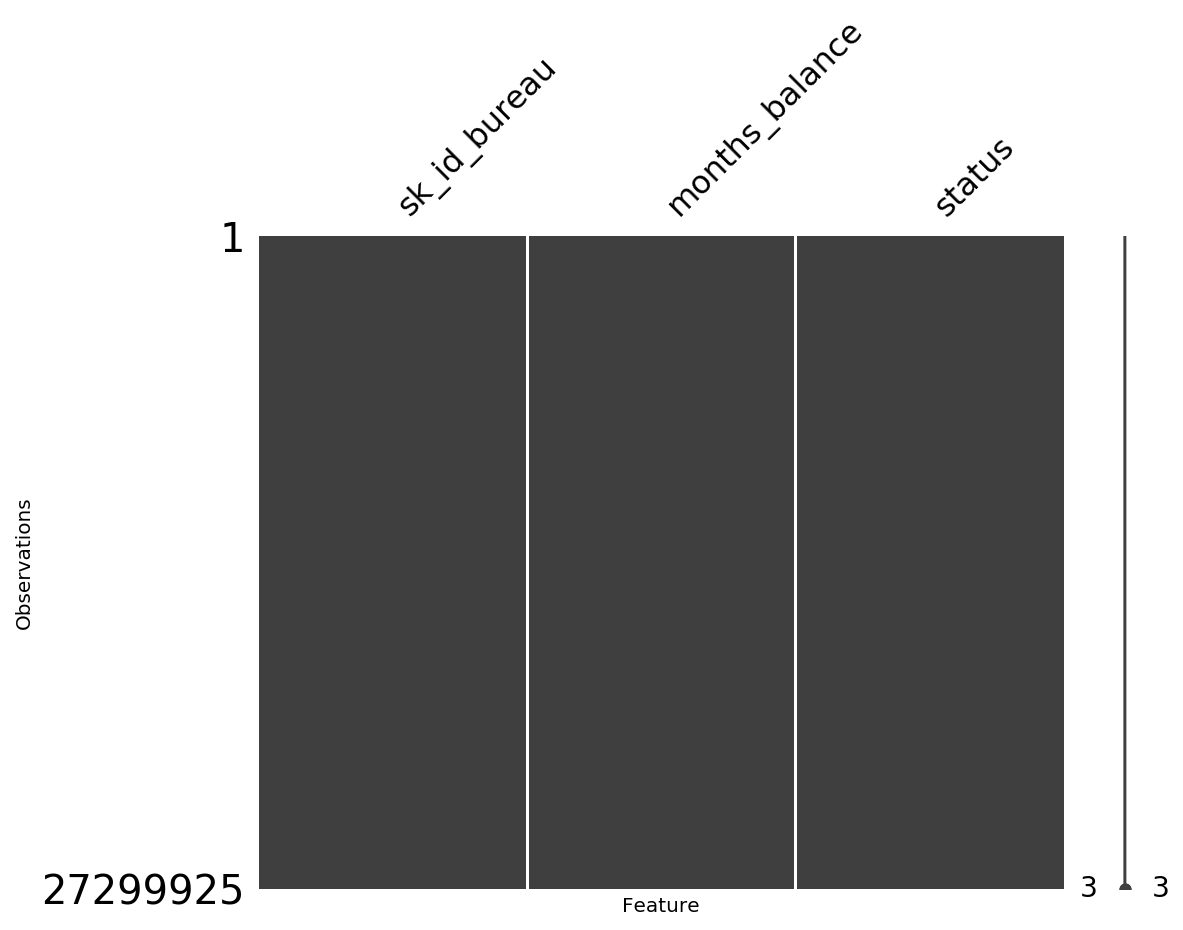

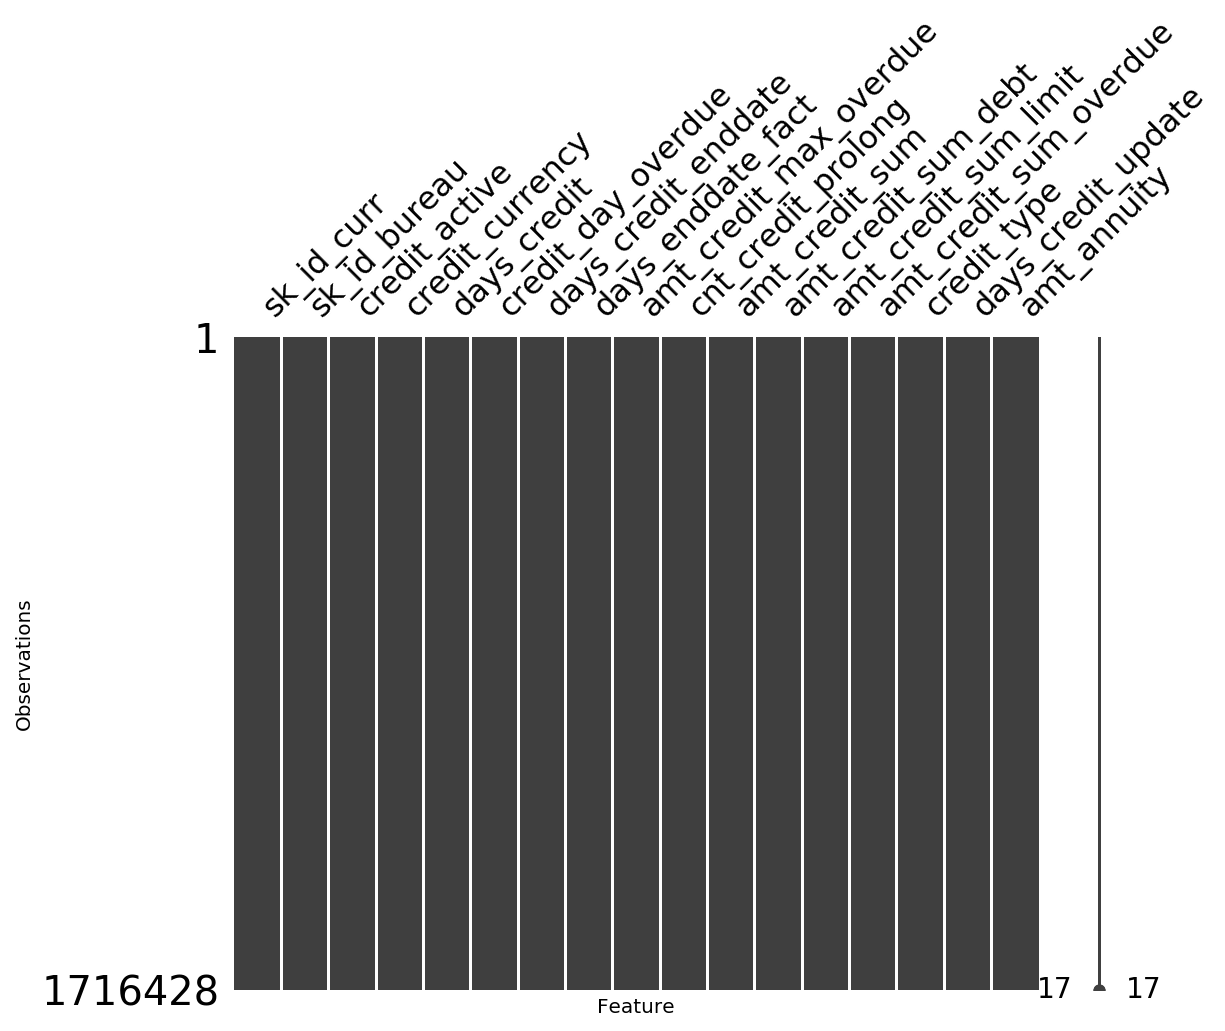

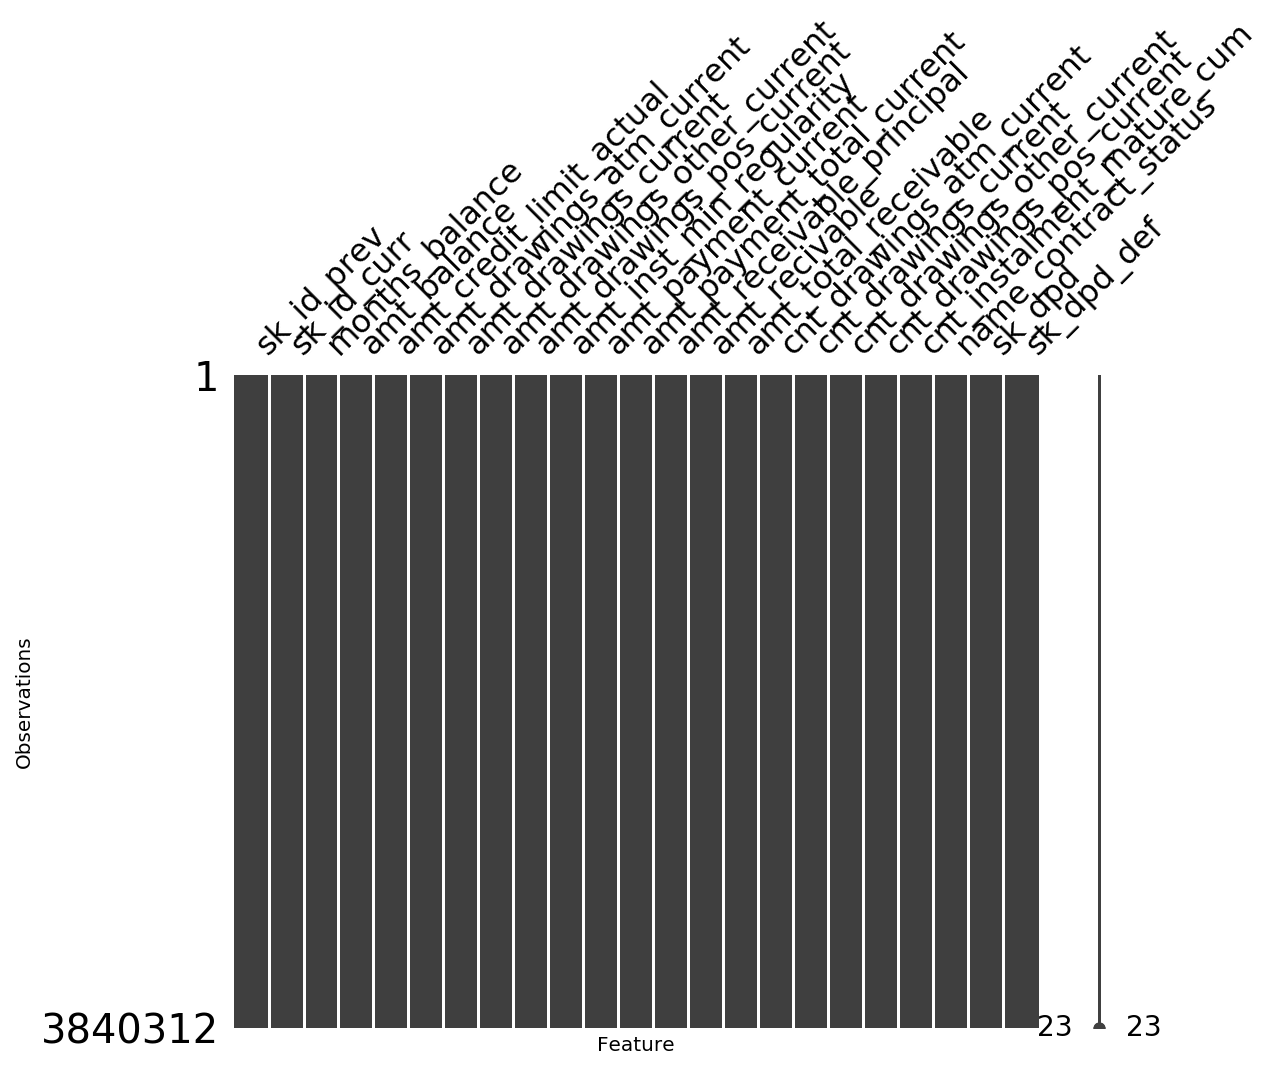

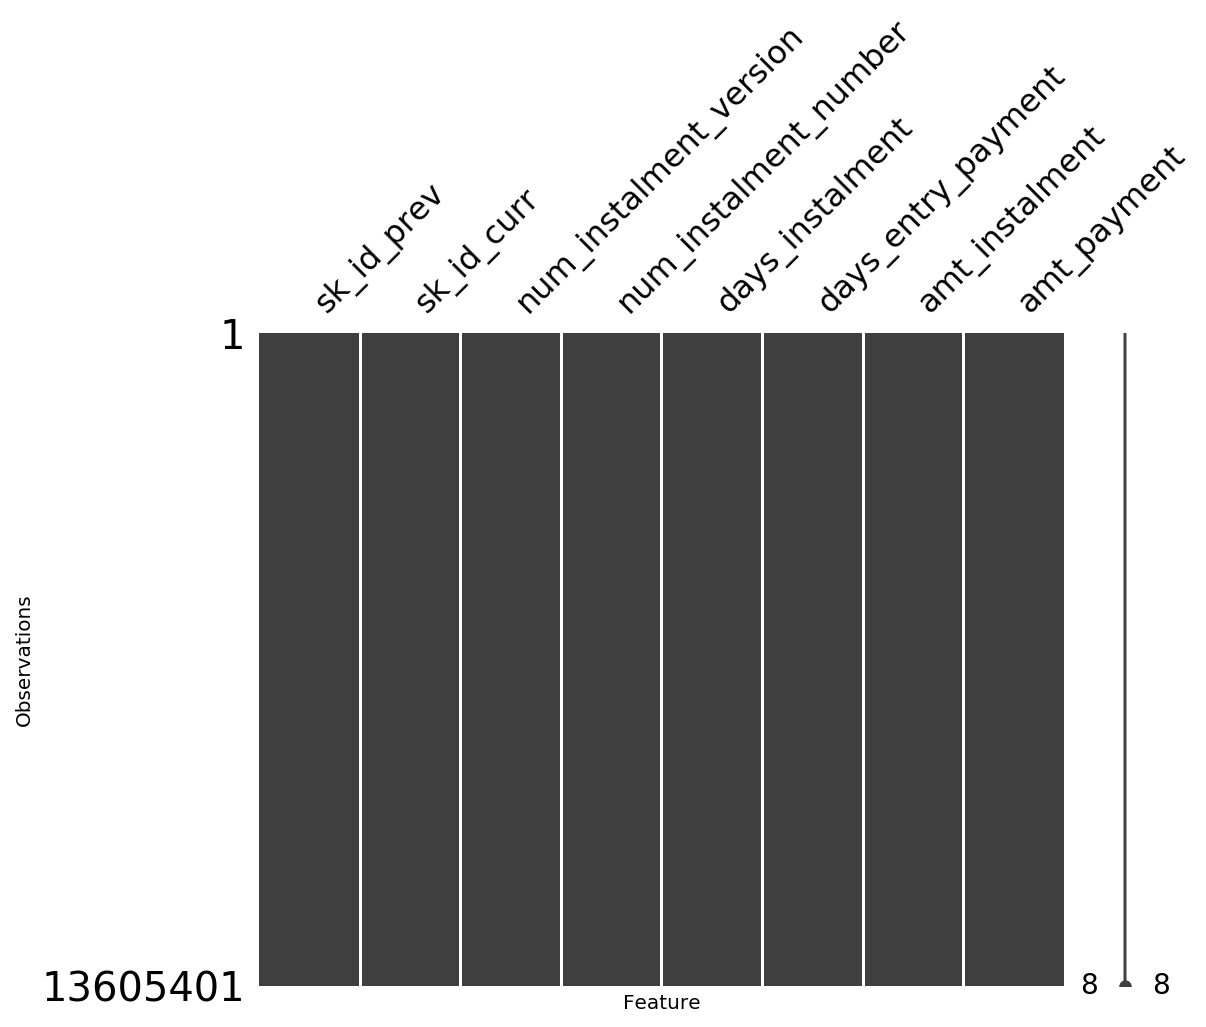

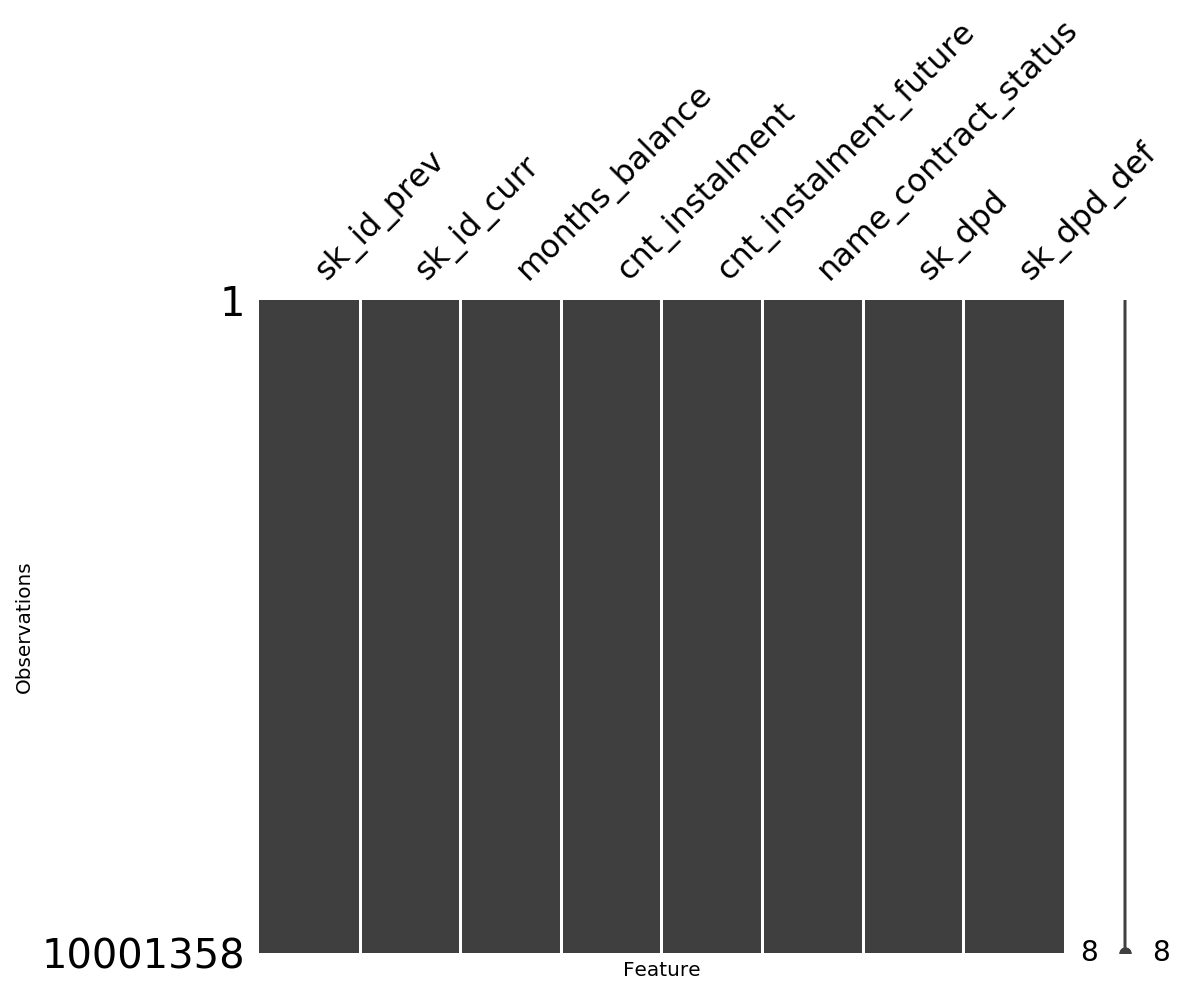

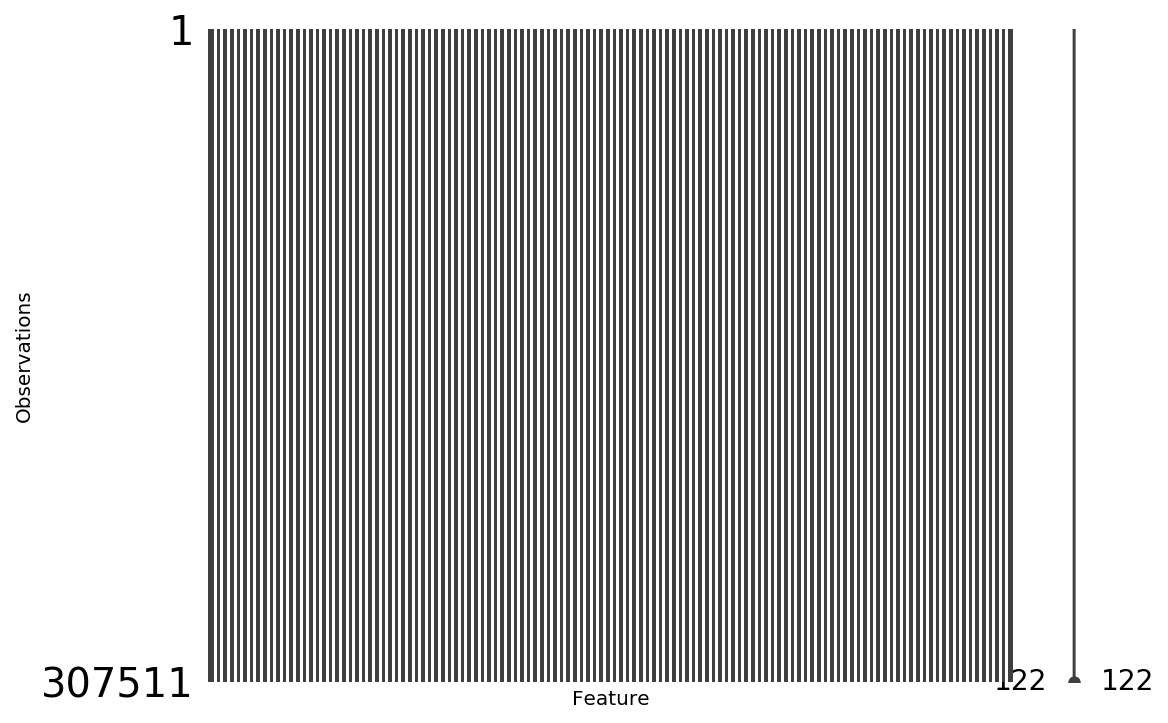

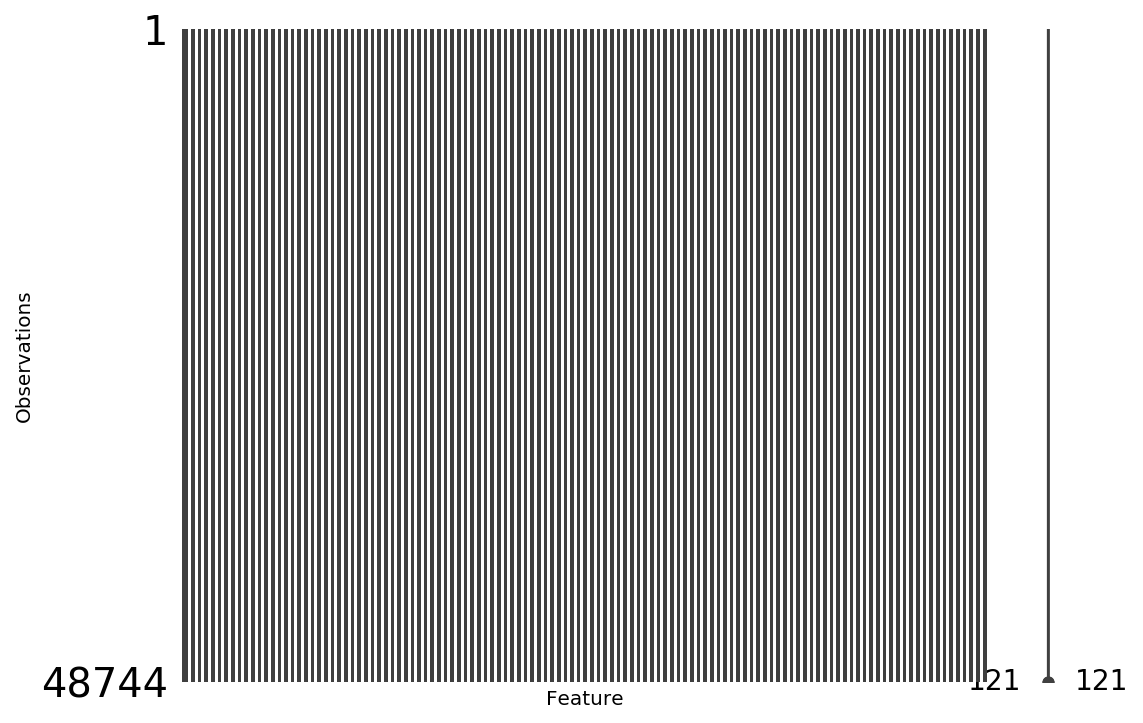

In [5]:
for df in dfs:
    print(len(df))
    msno.matrix(df,  figsize=(8,6));
    plt.xlabel('Feature')
    plt.ylabel('Observations');

### Assessing Our DataFrames

##### Training Data

##### Bureau

##### Bureau Balance

In [ ]:
bbdf.head()

##### Pos  Cash Balance